In [2]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
import Recommenders as Recommenders

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("ratings_Electronics.csv", header=None)

In [4]:
df = df.rename(columns={0: "userid", 1: "productid", 2: "rating", 3: "timestamp"})
df = df.drop(['timestamp'], axis=1)

In [5]:
df.head()

,userid,productid,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [6]:
df.shape

(7824482, 3)

In [7]:
df.isna().sum()

userid       0
productid    0
rating       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userid       object
productid    object
rating       float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [9]:
df.rating.value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: rating, dtype: int64

In [10]:
## getting those users only who have rated more than 50 products to limit our dataset/

In [11]:
df1 = df.sort_values('userid')

In [12]:
df2 = df1.groupby('userid').count()

In [13]:
userlist  = df2[df2.productid > 50].index.tolist()
newdf = df[df['userid'].isin(userlist)]
print(newdf.shape)

(122171, 3)


In [14]:
users = newdf['userid'].unique()
len(users)

1466

In [15]:
products = newdf['productid'].unique()
len(products)

47155

In [27]:
print(len(df))
df_subset = df.head(10000)
print(len(df_subset))

7824482
10000


## popularity based system

In [16]:
## the average rating of each product 
newdf.groupby('productid')['rating'].mean().sort_values(ascending=False).head()

productid
B00LKG1MC8    5.0
B000H8WLKC    5.0
B000HA4EZK    5.0
B004EHZZDW    5.0
B004EI0EG4    5.0
Name: rating, dtype: float64

In [17]:
# there is a problem with mean rating only as A product can make it to the top of the above
# list even if only a single user has given it five stars. 
# Therefore, the above stats can be misleading. Normally, 
# a product which is really a good one gets a higher rating by a large number of users.

In [18]:
## plot the total number of ratings for a product:
newdf.groupby('productid')['rating'].count().sort_values(ascending=False).head()  

productid
B0088CJT4U    204
B003ES5ZUU    177
B000N99BBC    163
B007WTAJTO    156
B00829TIEK    146
Name: rating, dtype: int64

In [19]:
# Now we know that both the average rating per movie and the number of ratings per 
# movie are important attributes. Let's create a new dataframe that contains both of these attributes.

In [20]:
ratings_mean_count = pd.DataFrame(newdf.groupby('productid')['rating'].mean()) 
ratings_mean_count['rating_counts'] = pd.DataFrame(newdf.groupby('productid')['rating'].count())
ratings_mean_count.head()

,rating,rating_counts
productid,,
0594481813,3.0,1
0970407998,2.5,2
0972683275,5.0,3
1400501466,3.0,5
1400501520,5.0,1


In [21]:
# plot a histogram for the number of ratings represented by the "rating_counts" column in the above dataframe. 

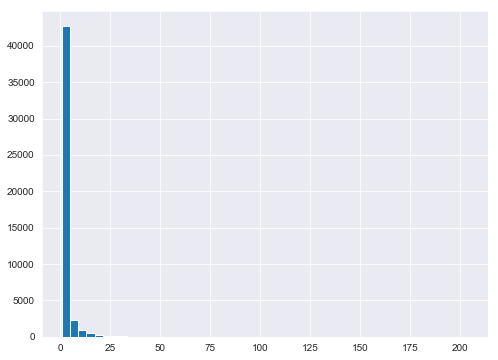

In [22]:
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set_style('dark')  
%matplotlib inline

plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_counts'].hist(bins=50) 

#most of the movies have received less than 50 ratings

In [23]:
# histogram for average ratings.

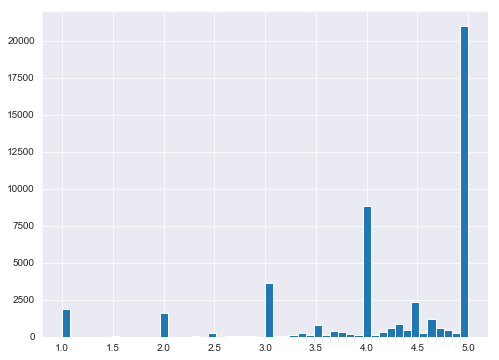

In [24]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

In [25]:
rating_df = df.head(10000)

In [29]:
product_grouped = df_subset.groupby(['productid']).agg({'rating': 'count'}).reset_index()
grouped_sum = product_grouped['rating'].sum()
print(grouped_sum)
product_grouped['percentage']  = product_grouped['rating'].div(grouped_sum)*100
product_grouped.sort_values(['rating', 'productid'], ascending = [0,1])

10000


,productid,rating,percentage
38,0972683275,1051,10.51
60,1400532655,484,4.84
61,140053271X,431,4.31
1229,B00000DM9W,332,3.32
1258,B00000J061,262,2.62
53,1400501466,250,2.50
63,1400599997,222,2.22
291,9573212919,199,1.99
1219,B000001ON6,185,1.85
711,9983891212,174,1.74


In [30]:
train_data, test_data = train_test_split(df_subset, test_size = 0.30, random_state=0)

In [65]:
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'userid','productid')

KeyError: 'score'

In [ ]:
# did not know why above error is coming.. please let me know why this error is coming and how to resolve above error. 

## Collaborative filtering 

In [60]:
from sklearn.model_selection import train_test_split
traindf, testdf= train_test_split(newdf, test_size=.30, random_state = 12)

In [66]:
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'userid', 'productid')

In [67]:
#Print the product for the user in training data
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data product for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend product for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data product for the user userid: A25RTRAPQAJBDJ:
------------------------------------------------------------------------------------
0972683275
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 1
no. of unique songs in the training set: 1045
Non zero values in cooccurence_matrix :4


,userId,movieId,score,rank
0,A25RTRAPQAJBDJ,9984976564,0.001335,1
1,A25RTRAPQAJBDJ,B000001OM5,0.001199,2
2,A25RTRAPQAJBDJ,9983891212,0.001138,3
3,A25RTRAPQAJBDJ,9967189371,0.000000,4
4,A25RTRAPQAJBDJ,9985596889,0.000000,5
5,A25RTRAPQAJBDJ,9983037394,0.000000,6
6,A25RTRAPQAJBDJ,B000001OLA,0.000000,7
7,A25RTRAPQAJBDJ,9989363234,0.000000,8
8,A25RTRAPQAJBDJ,9982128477,0.000000,9
9,A25RTRAPQAJBDJ,8544510019,0.000000,10


In [36]:
user_id = users[7]
#Fill in the code here
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data movies for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend movies for the user using personalized model
is_model.recommend(user_id)


------------------------------------------------------------------------------------
Training data movies for the user userid: A1A5KUIIIHFF4U:
------------------------------------------------------------------------------------
1400501466
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 1
no. of unique songs in the training set: 1045
Non zero values in cooccurence_matrix :9


,userId,movieId,score,rank
0,A1A5KUIIIHFF4U,1400501776,0.014545,1
1,A1A5KUIIIHFF4U,140053271X,0.004246,2
2,A1A5KUIIIHFF4U,1400501520,0.004202,3
3,A1A5KUIIIHFF4U,1400532736,0.004098,4
4,A1A5KUIIIHFF4U,1400698987,0.003472,5
5,A1A5KUIIIHFF4U,1400599997,0.002959,6
6,A1A5KUIIIHFF4U,B00000DM9W,0.002463,7
7,A1A5KUIIIHFF4U,1400532655,0.001931,8
8,A1A5KUIIIHFF4U,9967189371,0.000000,9
9,A1A5KUIIIHFF4U,9985596889,0.000000,10


In [68]:
user_id = users[7]
#Fill in the code here
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data movies for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend movies for the user using personalized model
is_model.recommend(user_id)


------------------------------------------------------------------------------------
Training data movies for the user userid: A1A5KUIIIHFF4U:
------------------------------------------------------------------------------------
1400501466
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 1
no. of unique songs in the training set: 1045
Non zero values in cooccurence_matrix :9


,userId,movieId,score,rank
0,A1A5KUIIIHFF4U,1400501776,0.014545,1
1,A1A5KUIIIHFF4U,140053271X,0.004246,2
2,A1A5KUIIIHFF4U,1400501520,0.004202,3
3,A1A5KUIIIHFF4U,1400532736,0.004098,4
4,A1A5KUIIIHFF4U,1400698987,0.003472,5
5,A1A5KUIIIHFF4U,1400599997,0.002959,6
6,A1A5KUIIIHFF4U,B00000DM9W,0.002463,7
7,A1A5KUIIIHFF4U,1400532655,0.001931,8
8,A1A5KUIIIHFF4U,9967189371,0.000000,9
9,A1A5KUIIIHFF4U,9985596889,0.000000,10


In [69]:
is_model.get_similar_items([1400532736])

no. of unique songs in the training set: 1045
Non zero values in cooccurence_matrix :0


,userId,movieId,score,rank
0,,9967189371,0.0,1
1,,9985596889,0.0,2
2,,9983037394,0.0,3
3,,B000001OLA,0.0,4
4,,9989363234,0.0,5
5,,9982128477,0.0,6
6,,8544510019,0.0,7
7,,9985617827,0.0,8
8,,9989463492,0.0,9
9,,B000000O2J,0.0,10


In [71]:
product = 'B000000O2J'
###Fill in the code here
is_model.get_similar_items([product])

no. of unique songs in the training set: 1045
Non zero values in cooccurence_matrix :1


,userId,movieId,score,rank
0,,9967189371,0.0,1
1,,9985596889,0.0,2
2,,9983037394,0.0,3
3,,B000001OLA,0.0,4
4,,9989363234,0.0,5
5,,9982128477,0.0,6
6,,8544510019,0.0,7
7,,9985617827,0.0,8
8,,9989463492,0.0,9
9,,9981739634,0.0,10
